In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [5]:
def adjust_amplitude(data, amplitude = 8192):
    if type(data) != np.ndarray:
        data = np.array(data)
    w = amplitude / np.max(abs(data))
    rescaled_data = [w * d for d in data]
    # rescaled_data = np.concatenate(rescaled_data)
    return rescaled_data

In [6]:
path = '../mag_data/'
files = os.listdir(path)
files.remove('.ipynb_checkpoints')
print(files)

['scaled_jeju20220513025240.csv', 'scaled_jeju20220516074239.csv', 'scaled_jeju20220518053738.csv', 'scaled_jeju20220519084837.csv', 'scaled_jeju20220518090338.csv', 'scaled_jeju20220515155139.csv', 'scaled_jeju20220515012539.csv', 'scaled_jeju20220517092838.csv', 'scaled_jeju20220514015140.csv', 'scaled_jeju20220516011239.csv', 'scaled_jeju20220512154641.csv', 'scaled_jeju20220515150739.csv', 'scaled_jeju20220516132238.csv', 'scaled_jeju20220516073339.csv', 'scaled_jeju20220517104638.csv', 'scaled_jeju20220514031339.csv', 'scaled_jeju20220517155338.csv', 'scaled_jeju20220518110637.csv', 'scaled_jeju20220517134138.csv', 'scaled_jeju20220513142940.csv', 'scaled_jeju20220516010239.csv']


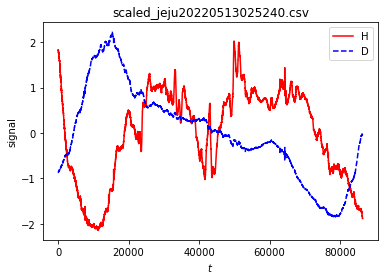

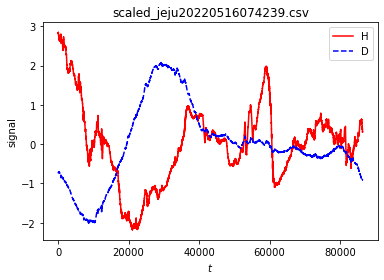

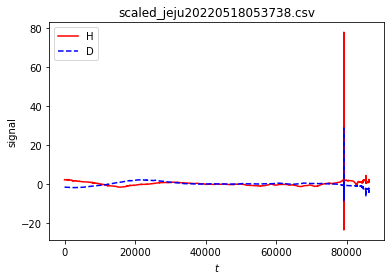

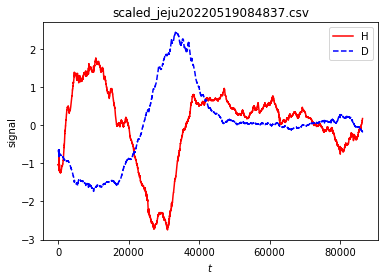

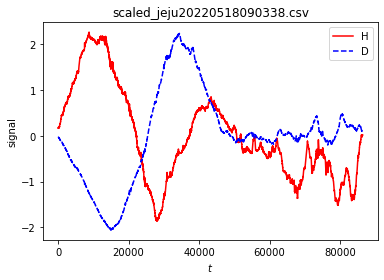

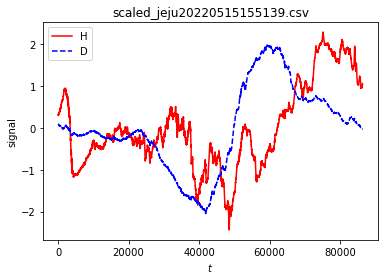

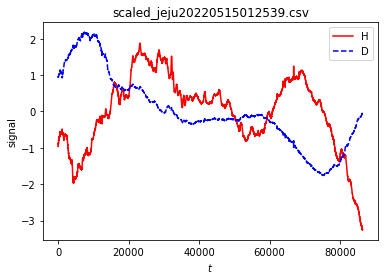

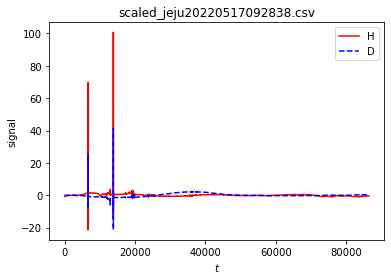

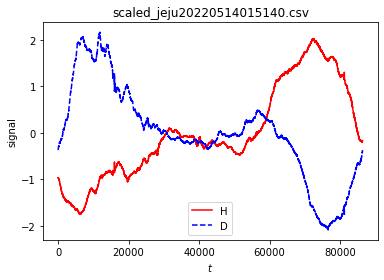

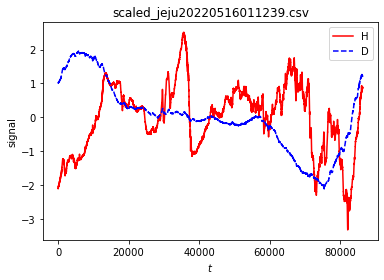

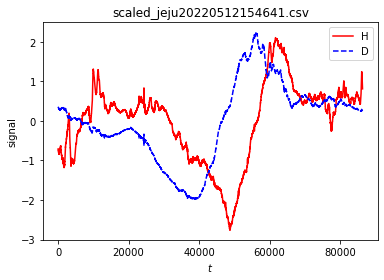

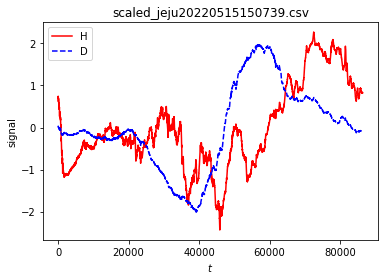

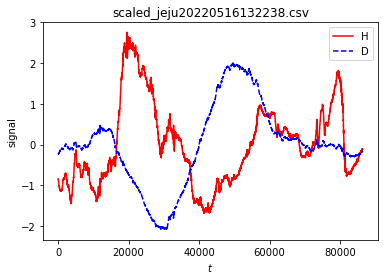

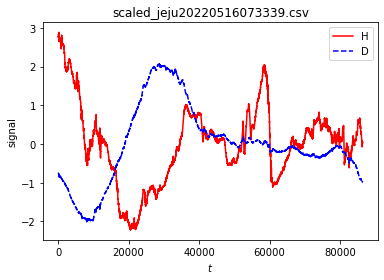

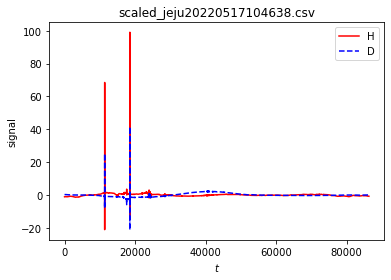

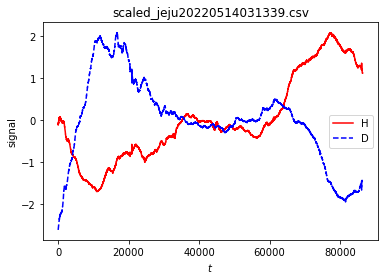

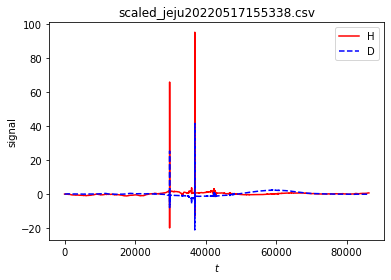

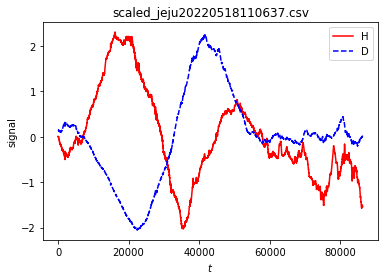

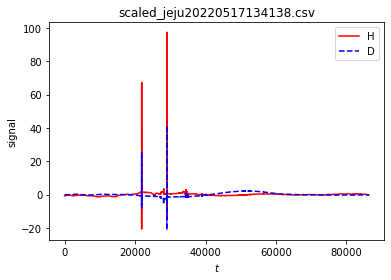

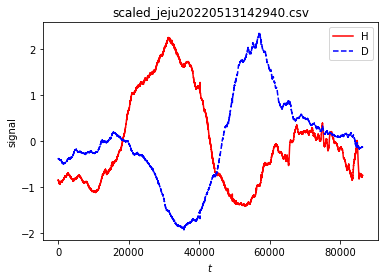

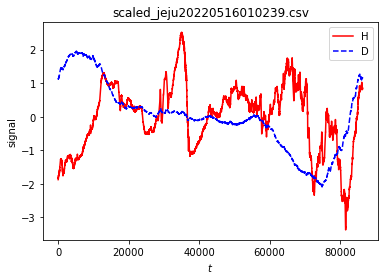

In [7]:
for i in range(len(files)):
    df = pd.read_csv(path + files[i])
    plt.title(files[i])
    # plt.plot(df["scaled_jeju_f"], label = "F", c = 'g', ls = ':')
    plt.plot(df["scaled_jeju_h"], label = "H", c = 'r')
    plt.plot(df["scaled_jeju_d"], label = "D", c = 'b', ls = '--')
    plt.xlabel(r'$t$')
    plt.ylabel("signal")
    plt.legend()
    plt.savefig("../segment/img_%s.png"%files[i], format = "png")
    plt.show()
    
    H = adjust_amplitude(df["scaled_jeju_h"].tolist())
    D = adjust_amplitude(df["scaled_jeju_d"].tolist())
    F = adjust_amplitude(df["scaled_jeju_f"].tolist(), amplitude = 2048)
    H = np.array(H)
    D = np.array(D)
    F = np.array(F)
    
    wavfile.write('../segment/segment_h_%d.wav'%i, rate=44100, data=H.astype(np.int16))
    wavfile.write('../segment/segment_d_%d.wav'%i, rate=44100, data=D.astype(np.int16))
    wavfile.write('../segment/segment_f_%d.wav'%i, rate=44100, data=F.astype(np.int16))
    